# ЗАДАНИЕ НА ВЕКТОРИЗАЦИЮ
**Задание выполнил:** Пшеничников Глеб, ВМК МГУ, 317 группа  
**Постановка задачи:** сравнить время работы трех реализаций задачи E.Поиск максимума:

1. Полностью невекторизованную (без использования numpy)
2. Частично векторизованную
3. Полностью векторизованную

**Условие задачи E.Поиск максимума:** Написать функцию, принимающую вектор x и возвращающую максимальный элемент в нем среди элементов, перед которыми стоит нулевой. Если подходящих элементов нет, функция должна возвращать None.

В качетсве векторизации будем использовать функции из библиотеки *numpy*. Результаты будут представлены ввиде графиков зависимости времени исполнения от длины входных данных.


In [81]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Для сравнения времени работы трех реализаций создадим единый набор тестов различной длины при помощи функции *generate_test(n)*, где n - длина теста. В переменной *tests* будет хранить тесты, в *len_of_tests* - длины соотвутсвующих тестов.

In [99]:
def generate_test(n):
  array_of_random = np.random.random(n)
  mask = array_of_random < 0.4
  test = np.random.randint(1, 10001, size=n)
  test[mask] = 0
  return test

min_len = 50000
max_len = 1050001
step = 50000
count_of_tests = max_len // step
len_of_tests = np.arange(min_len, max_len, step)
tests = np.array([generate_test(n) for n in len_of_tests], dtype=object)

Для вычисления времени работы реализации будем исользовать функцию *timed(method)*, которая будет возвращать массив времен работы на соответсвующих тестов из *tests*.

In [83]:
import time

def timed(method):
  time_of_test = np.empty(shape=count_of_tests)
  for i in range(count_of_tests):
    time_start = time.time()
    result = method(tests[i])
    time_end = time.time()
    time_of_test[i] = (time_end - time_start) * 1000
  return time_of_test

## Полностью невекторизованная реализация
Напишем функцию **no_vectorization(x)** из условия, используя только циклы.   
Для создания массива *values_after_zero* из элементов, перед которыми стоит ноль, и последующим поиском максимального элемента в нем будем использовать циклы.

In [100]:
def no_vectorization(x):
  length = x.size
  values_after_zero = []
  for i in range (1, length):
    if x[i - 1] == 0:
      values_after_zero.append(x[i])
  if len(values_after_zero) == 0:
    return None
  max_value = values_after_zero[0]
  length = len(values_after_zero)
  for i in range (1, length):
    if values_after_zero[i] > max_value:
      max_value = values_after_zero[i]
  return max_value

time_of_no_vectorization = timed(no_vectorization)

Построим график зависимости времени выполнения от длины входных данных

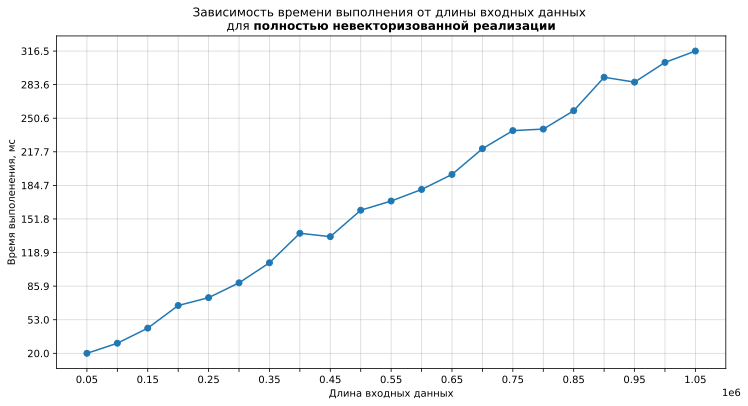

In [101]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(True, alpha=0.5)
plt.title("Зависимость времени выполнения от длины входных данных \nдля $\\mathbf{полностью\\ невекторизованной\\ реализации}$")
plt.xlabel("Длина входных данных")
plt.ylabel("Время выполенения, мс")

ticks_for_y = np.linspace(np.min(time_of_no_vectorization), np.max(time_of_no_vectorization), 10)
ax.set_yticks(ticks_for_y)

ax.set_xticks(len_of_tests)
ax.set_xticklabels([f'{x:.2f}' for x in len_of_tests/1e6])
for i, label in enumerate(ax.get_xticklabels()):
    label.set_visible(i % 2 == 0)

plt.plot(len_of_tests, time_of_no_vectorization, marker='o')

ax.annotate('1e6', xy=(1, 0), xytext=(15, -20), xycoords=('axes fraction', 'axes fraction'),
            textcoords='offset points', ha='right', va='top')

plt.show()

In [117]:
mean_of_no_vectorization = np.mean(time_of_no_vectorization / len_of_tests)
print("{:.2e}".format(mean_of_no_vectorization))

3.13e-04


Среднее время выполнение одного теста для полностью невекторизованной реализации: **3.13e-04**

## Частично векторизованная реализация
Напишем функцию **partial_vectorization(x)** из условия.  
Для создания массива *values_after_zero* из элементов, перед которыми стоит ноль, будет использовать функцию *np.where()* из библиотеки *numpy*.  
Для нахождения максимального значения в массиве *values_after_zero* будем использовать циклы.

In [108]:
def partial_vectorization(x):
  values_after_zero = np.where(x == 0)[0]
  values_after_zero = values_after_zero[np.where(values_after_zero != x.size - 1)]
  values_after_zero = x[values_after_zero + 1]
  if len(values_after_zero) == 0:
    return None
  max_value = values_after_zero[0]
  length = len(values_after_zero)
  for i in range (1, length):
    if values_after_zero[i] > max_value:
      max_value = values_after_zero[i]
  return max_value


time_of_partial_vectorization = timed(partial_vectorization)

Построим график зависимости времени выполнения от длины входных данных

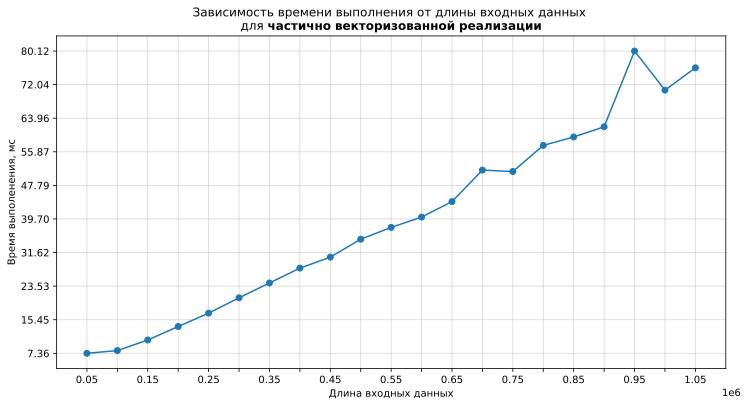

In [109]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(True, alpha=0.5)
plt.title("Зависимость времени выполнения от длины входных данных \nдля $\\mathbf{частично\\ векторизованной\\ реализации}$")
plt.xlabel("Длина входных данных")
plt.ylabel("Время выполенения, мс")

ticks_for_y = np.linspace(np.min(time_of_partial_vectorization), np.max(time_of_partial_vectorization), 10)
ax.set_yticks(ticks_for_y)

ax.set_xticks(len_of_tests)
ax.set_xticklabels([f'{x:.2f}' for x in len_of_tests/1e6])
for i, label in enumerate(ax.get_xticklabels()):
    label.set_visible(i % 2 == 0)

plt.plot(len_of_tests, time_of_partial_vectorization, marker='o')

ax.annotate('1e6', xy=(1, 0), xytext=(15, -20), xycoords=('axes fraction', 'axes fraction'),
            textcoords='offset points', ha='right', va='top')

plt.show()

In [118]:
mean_of_partial_vectorization = np.mean(time_of_partial_vectorization / len_of_tests)
print("{:.2e}".format(mean_of_partial_vectorization))

7.44e-05


Среднее время выполнение одного теста для частично векторизованной реализации: **7.44e-05**

## Полностью векторизованная реализация
Напишем функцию **full_vectorization(x)** из условия.  
Для создания массива *values_after_zero* из элементов, перед которыми стоит ноль, и последующим поиском максимального элемента в нем будем использовать функции *np.where()* и *np.max()* из библиотеки *numpy*.

In [111]:
def full_vectorization(x):
    y = np.where(x == 0)[0]
    y = y[np.where(y != x.size - 1)]
    if y.size > 0:
        return int(np.max(x[y + 1]))
    return None

time_of_full_vectorization = timed(full_vectorization)

Построим график зависимости времени выполнения от длины твходных данных

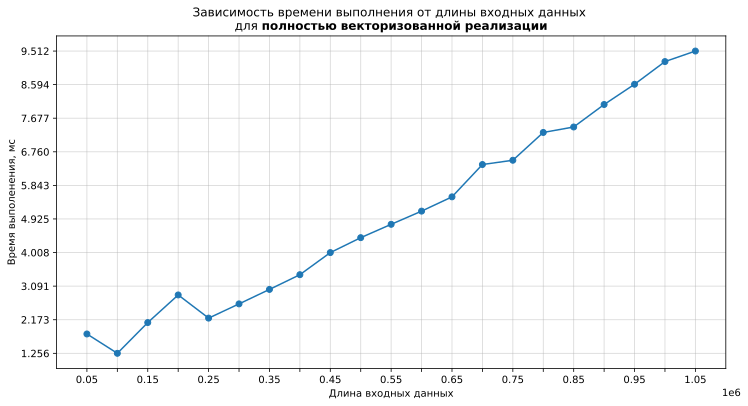

In [112]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(True, alpha=0.5)
plt.title("Зависимость времени выполнения от длины входных данных \nдля $\\mathbf{полностью\\ векторизованной\\ реализации}$")
plt.xlabel("Длина входных данных")
plt.ylabel("Время выполенения, мс")

ticks_for_y = np.linspace(np.min(time_of_full_vectorization), np.max(time_of_full_vectorization), 10)
ax.set_yticks(ticks_for_y)

ax.set_xticks(len_of_tests)
ax.set_xticklabels([f'{x:.2f}' for x in len_of_tests/1e6])
for i, label in enumerate(ax.get_xticklabels()):
    label.set_visible(i % 2 == 0)

plt.plot(len_of_tests, time_of_full_vectorization, marker='o')

ax.annotate('1e6', xy=(1, 0), xytext=(15, -20), xycoords=('axes fraction', 'axes fraction'),
            textcoords='offset points', ha='right', va='top')

plt.show()

In [119]:
mean_of_full_vectorization = np.mean(time_of_full_vectorization / len_of_tests)
print("{:.2e}".format(mean_of_full_vectorization))

1.08e-05


Среднее время выполнение одного теста для полностью векторизованной реализации: **1.08e-05**

## Вывод
Объединим три графика в один и проанализируем полученные результаты

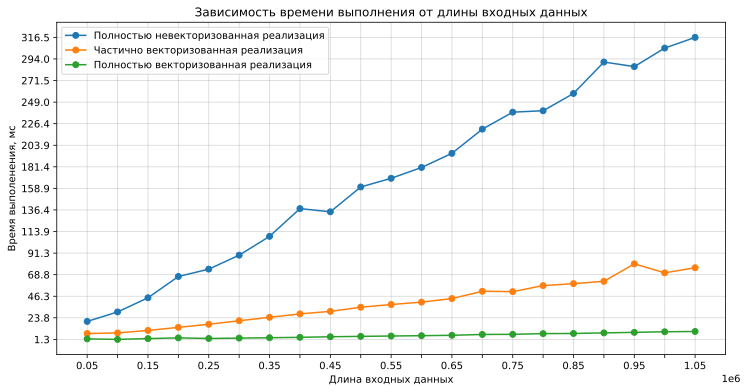

In [114]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.grid(True, alpha=0.5)
plt.title("Зависимость времени выполнения от длины входных данных")
plt.xlabel("Длина входных данных")
plt.ylabel("Время выполенения, мс")

ticks_for_y = np.linspace(np.min(time_of_full_vectorization), np.max(time_of_no_vectorization), 15)
ax.set_yticks(ticks_for_y)

ax.set_xticks(len_of_tests)
ax.set_xticklabels([f'{x:.2f}' for x in len_of_tests/1e6])
for i, label in enumerate(ax.get_xticklabels()):
    label.set_visible(i % 2 == 0)

plt.plot(len_of_tests, time_of_no_vectorization, marker='o', label='Полностью невекторизованная реализация')
plt.plot(len_of_tests, time_of_partial_vectorization, marker='o', label='Частично векторизованная реализация')
plt.plot(len_of_tests, time_of_full_vectorization, marker='o', label='Полностью векторизованная реализация')

ax.annotate('1e6', xy=(1, 0), xytext=(15, -20), xycoords=('axes fraction', 'axes fraction'),
            textcoords='offset points', ha='right', va='top')
ax.legend(loc='upper left')

plt.show()

In [120]:
print("Частичная веторизация быстрее, чем отсутствие векторизация в: ",
      "{:.3}".format(mean_of_no_vectorization/mean_of_partial_vectorization), "раз")
print("Полная веторизация быстрее, чем отсутствие векторизация в: ",
      "{:.3}".format(mean_of_no_vectorization/mean_of_full_vectorization), "раз")
print("Полная веторизация быстрее, чем частичная векторизация в: ",
      "{:.3}".format(mean_of_partial_vectorization/mean_of_full_vectorization), "раз")

Частичная веторизация быстрее, чем отсутствие векторизация в:  4.21 раз
Полная веторизация быстрее, чем отсутствие векторизация в:  29.0 раз
Полная веторизация быстрее, чем частичная векторизация в:  6.9 раз


# Вывод

Исходя из рузультатов можно сделать вывод о том, что во всех реализациях имеет место линейная зависимость времени выполения от длины теста. При этом поностью векторизированная реализация работает в разы быстрее:


*   В 29, чем реализация без векторизации
*   В 6.9, чем реализация с частичной векторизацией  

Такие результаты обуслевлены использованием функций *np.where()* и *np.max()* в полностью векторизованной реализации.

Так же подход с частичной векторзацией работает быстрее, чем подход без векторизации в 4.21 раза. Это произошло из-за использования функции *np.where()* из библиотеки *numpy*, вместо цикла.

    
Графики наглядно подтверждают эти выводы.  

Итог: **лучшим подходом с точки зрения времени выполнения и эффективности является реализация с полной векторизацией.**

